<a href="https://colab.research.google.com/github/CauraTheAvatar/CauraTheAvatar/blob/main/CauraAIQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Climb Algorithm

In [3]:
import numpy as np
from copy import deepcopy
from copy import copy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import random
import matplotlib.pyplot as plt

!pip install ortools
from ortools.constraint_solver import pywrapcp

%matplotlib inline

# Data Structures

In [4]:
# Defining the Destination (City) Class
class City:
  def __init__(self, name, x, y):
    self.name = name
    self.coordinates = (x, y)
    self.distances = {}

  def add_distance(self, city, distance):
    self.distances[city.name] = distance

  def get_distance_to(self, city_name):
    return self.distances.get(city_name)

  def __str__(self):
    return f"City: {self.name} - Coordinates: {self.coordinates} - Distances: {self.distances}"

In [5]:
# Creating Destination Objects and Adding the Distances
city1 = City("Dorado Park", 139, 35)
city2 = City("Auas Blick", 2, 49)
city3 = City("Wanaheda", -43, -23)
city4 = City("Klein Windhoek", 18, -34)
city5 = City("Eros", 145, -38)

city1.add_distance(city2, 4824)
city1.add_distance(city3, 3522)
city1.add_distance(city4, 1826)
city1.add_distance(city5, 4844)

city2.add_distance(city1, 2387)
city2.add_distance(city3, 3749)
city2.add_distance(city4, 4012)
city2.add_distance(city5, 3354)

city3.add_distance(city1, 713)
city3.add_distance(city2, 3788)
city3.add_distance(city4, 2817)
city3.add_distance(city5, 2072)

city4.add_distance(city1, 1307)
city4.add_distance(city2, 3174)
city4.add_distance(city3, 2907)
city4.add_distance(city5, 3244)

city5.add_distance(city1, 2335)
city5.add_distance(city2, 4602)
city5.add_distance(city3, 3818)
city5.add_distance(city4, 3337)

print(city1)
print(city2)
print(city3)
print(city4)
print(city5)

City: Dorado Park - Coordinates: (139, 35) - Distances: {'Auas Blick': 4824, 'Wanaheda': 3522, 'Klein Windhoek': 1826, 'Eros': 4844}
City: Auas Blick - Coordinates: (2, 49) - Distances: {'Dorado Park': 2387, 'Wanaheda': 3749, 'Klein Windhoek': 4012, 'Eros': 3354}
City: Wanaheda - Coordinates: (-43, -23) - Distances: {'Dorado Park': 713, 'Auas Blick': 3788, 'Klein Windhoek': 2817, 'Eros': 2072}
City: Klein Windhoek - Coordinates: (18, -34) - Distances: {'Dorado Park': 1307, 'Auas Blick': 3174, 'Wanaheda': 2907, 'Eros': 3244}
City: Eros - Coordinates: (145, -38) - Distances: {'Dorado Park': 2335, 'Auas Blick': 4602, 'Wanaheda': 3818, 'Klein Windhoek': 3337}


### Display Data

In [6]:
# Always ensure that the destinations(City) being plotted are lists of arrays
cities = [(139, 35), (2, 49), (-43, -23), (18, -34), (145, -38)]


In [7]:
index = [str(city) for city in cities]

In [8]:
# plt.plot(city1, city2, city3, city4, city5, 'o')
# # plt.show()

In [9]:
import string

In [10]:
print(cities)

[(139, 35), (2, 49), (-43, -23), (18, -34), (145, -38)]


In [11]:
for city in cities:
  print(type(city))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [12]:
index = [str(city) for city in cities]
x = [city for city in cities][1]
y = [city for city in cities][2]

In [13]:
print(index)
print(x)
print(y)

['(139, 35)', '(2, 49)', '(-43, -23)', '(18, -34)', '(145, -38)']
(2, 49)
(-43, -23)


<ipython-input-14-37f44233f7ac>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


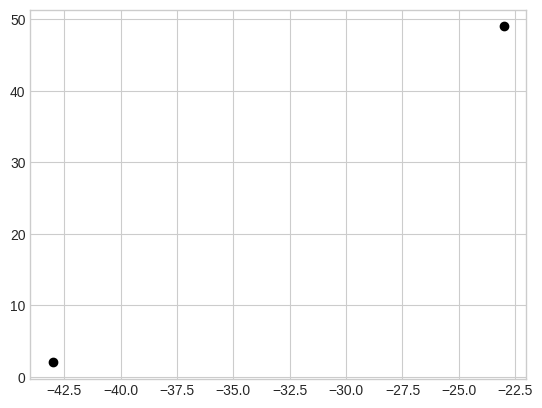

In [14]:
plt.style.use('seaborn-whitegrid')

plt.plot(y, x, 'o', color='black')

# Defining Functions

### Compute Distance Between Two Cities

In [15]:
if not isinstance(cities, list):
  raise TypeError("cities must be a list")

In [1]:
!pip install dataclasses

In [16]:
from dataclasses import dataclass

In [17]:
print(type(cities))
print(cities)

<class 'list'>
[(139, 35), (2, 49), (-43, -23), (18, -34), (145, -38)]


In [18]:
x = [1, 2]
y = [3, 4]

In [19]:
def distance(x1,y1 ,x2,y2):
  dis = np.sqrt(np.square(x1-x2) + np.square(y1-y2))
  return dis

print(f"first ({x[0]},{y[0]}) and second ({x[1]},{y[1]})")
distance(x[0],y[0], x[1],y[1])

first (1,3) and second (2,4)


1.4142135623730951

### Creating a Distance Matrix

In [20]:
def tsp_matrix(x,y):
  tsp = []
  row = []
  for i in range(len(x)):
    row.clear()
    for j in range(len(x)):
      row.append(distance(x[i], y[i], x[j], y[j]))
    r = copy(row)
    tsp.append(r)
  return tsp

In [ ]:
# Testing Distance Matrix
print(tsp_matrix(x,y))

[[0.0, 1.4142135623730951], [1.4142135623730951, 0.0]]


### Creating a Random Route Solution

In [21]:
from random import shuffle

def generate_initial_route(num_places):
  places = list(range(num_places))
  random.shuffle(places)

  return places

In [22]:
def random_solution(tsp):
  cities = list(range(len(tsp)))
  solution = []

  for i in range(len(tsp)):
    random_city = cities[random.randint(0,len(cities)-1)]
    solution.append(random_city)
    cities.remove(random_city)

  return solution

In [23]:
# Tesing the Function
tsp = tsp_matrix(x,y)
print(random_solution(tsp), len(random_solution(tsp)))

[1, 0] 2


### Route Length of the Solution

In [24]:
def route_length(tsp, solution):

  length = 0
  for i in range(len(solution)):
    length += tsp[solution[i-1]][solution[i]]
  return length

In [25]:
# Testing Route Length Function
tsp = tsp_matrix(x,y)
rands = random_solution(tsp)
print(route_length(tsp, rands))

2.8284271247461903


### Finding Neighbors of Solution

In [34]:
def calculate_j(i, solution):
    j = (i + 1) % len(solution)
    return j

# Define a solution list
solution = [1, 2, 3, 4]

# Pass the value of i and solution as arguments
i = 0
j = calculate_j(i, solution)


In [35]:
def explore_neighbors(solution):
  neighbors = []
  #This for loop will make new list from solution by changing element positions
  for i in range(len(solution)):
    a = solution.copy()
    a[i] = solution[j]
    a[j] = solution[i]
    neighbors.append(a)
  return neighbors

In [36]:
# Testing Neighbors Function
solution = random_solution(tsp)
print(explore_neighbors(solution))

[[0, 1], [1, 0]]


### Exploring Neighbors

In [37]:
def explore_neighbor(route):
  i, j = random.sample(range(len(route)), 2)
  route[i], route[j] = route[j], route[i]
  return route

### Finding the Best Neighbor

In [38]:
def find_best_neighbor(tsp, neighbors):

  # This serves as the initial answer
  best_neighbor_length = route_length(tsp, neighbors[0])
  best_neighbor = neighbors[0]

  for i in neighbors:
    current_length = route_length(tsp, i)
    if current_length < best_neighbor_length:
      best_neighbor_length = current_length
      best_neighbor = i

    return best_neighbor, best_neighbor_length

### Plot Cost Function

In [39]:
def plot_cost(cost_value):
  iteration = []
  for i in range(1, len(cost_value) +1):
    iteration.append(i)

  plt.plot(iteration, cost_value, 'o', color='blue');

### Hill Climbing Function

In [40]:
def hill_climbing(tsp):

  cost_value = []

  # Function to give a Random Road to All Destinations (cities)
  current_solution = random_solution(tsp)

  # Cost Value for Current Route
  current_route_length = route_length(tsp, current_solution)
  print(f"The current solution is {current_solution} with a cost value of: {current_route_length}")

  neighbors = explore_neighbors(solution)
  best_neighbor, best_neighbor_length = explore_best_neighbor(tsp, neighbors)

  while best_neighbor_length < current_route_length:
    current_solution = best_neighbor
    print(f"Current solution is {current_solution} with a cost value of: {current_route_length}")
    current_route_length = best_neighbor_length

    cost_value.append(current_route_length)

    neighbors = explore_neighbors(current_solution)
    best_neighbor, best_neighbor_length = explore_best_neighbor(tsp, neighbors)

  return current_solution, current_route_length, cost_value

In [41]:
def cost_value(x, y):
  return x**2 + y**2

def hill_climb(initial_x, initial_y, max_iterations=100, step_size=1):
  current_x = initial_x
  current_y = initial_y
  best_x = current_x
  best_y = current_y
  best_cost = cost_function(current_x, current_y)

  for _ in range(max_iterations):

    neighbors = [(current_x + step_size, current_y), (current_x - step_size, current_y),
                 (current_x, current_y + step_size), (current_x, current_y - step_size)]

    for neighbor_x, neighbor_y in neighbors:

      # Check if neighbor is within the bounds
      if -10 <= neighbor_x <= 10 and -10 <= neighbor_y <= 10:
        neighbor_cost = cost_function(neighbor_x, neighbor_y)

        # If a better cost is found, best state will be updated
        if neighbor_cost < best_cost:
          best_x = neighbor_x
          best_y = neighbor_y
          best_cost = neighbor_cost

      # Shift to the best neighbor found
      current_x = best_x
      current_y = best_y

  return best_x, best_y, best_cost

# Main Class

In [53]:
def explore_best_neighbor(tsp, neighbors):

    # Compute the distance between destinations (cities) - m*m
    tsp = tsp_matrix(x,y)

    # Best solution found using Hill Climbing Algorithm
    best_solution, best_cost, cost_value, total_distance = hill_climbing(tsp)

    print("\n" + f"The best route to take is {best_solution} and the best cost is {best_cost}")

    plot_cost(cost_value)
    plt.xlabel("iteration")
    plt.ylabel("cost")

    return best_neighbor, best_neighbor_length;

# Visualization

In [54]:
def visualize_landscape(tsp, optimal_solution):
    x = range(len(cities))
    y = range(len(cities))

    # Get coordinates of optimal solution
    optimal_x, optimal_y = cities[optimal_solution[0]], cities[optimal_solution[1]]

    # Reshape tsp as a 2D array for imshow
    costs = tsp.astype(np.float64).reshape(len(cities), len(cities))

    # Create heatmap
    plt.imshow(costs, cmap='hot', extent=(0, len(cities), 0, len(cities)))
    plt.colorbar(label='Distance')
    plt.xlabel('City')
    plt.ylabel('City')
    plt.title('Distance Heatmap')

    # Plot optimal solution
    plt.scatter(optimal_x, optimal_y, marker='o', color='green', label='Optimal Solution')
    plt.legend()
    plt.show()


## Text-Based Visualisation

**City Names:**

- City 1: Dorado Park
- City 2: Auas Blick
- City 3: Wanaheda
- City 4: Klein Windhoek
- City 5: Eros

**Initial State:**

1. The algorithm starts with a random route visiting all cities (e.g., 2 -> 1 -> 3 -> 4 -> 5).
2. It calculates the total distance traveled along this route.

**Exploration:**

1. The algorithm creates a set of "neighbor" routes. These are created by swapping the positions of two randomly chosen cities in the current route (e.g., swapping 2 and 3 creates 1 -> 3 -> 2 -> 4 -> 5).
2. It calculates the total distance for each neighbor route.

**Improvement:**

1. The algorithm compares the total distances of all neighbors with the current route.
2. If a neighbor has a shorter total distance, it becomes the new "current" route. This represents a move "uphill" towards a more optimal solution.

**Iteration:**

1. The exploration and improvement steps are repeated for a specified number of iterations (or until no better neighbors are found).

**Termination and Result:**

1. The algorithm terminates when there are no neighbors with a shorter distance than the current route.
2. The final route represents the "best solution" found by the hill climbing algorithm, along with its total distance.

**Visualization Example:**

**Iteration 1:**

- Current Route: 2 -> 1 -> 3 -> 4 -> 5 (Distance: D1)
- Neighbors:
    - 1 -> 3 -> 2 -> 4 -> 5 (Distance: D2)
    - 2 -> 4 -> 1 -> 3 -> 5 (Distance: D3)
    - ... (other neighbors)

**Iteration 2 (Assuming D2 is shorter than D1):**

- New Current Route: 1 -> 3 -> 2 -> 4 -> 5 (Distance: D2)
- Neighbors are explored again based on the new current route.

**...** (This process continues until termination)

**Final Result:**

- Best Route: (e.g., 3 -> 1 -> 4 -> 2 -> 5)
- Total Distance: D_final (Shortest distance found)
